# **⚓ Hadoop**



Hadoop es una estructura de software de código abierto para almacenar datos y ejecutar aplicaciones en clústeres de hardware comercial. Proporciona almacenamiento masivo para cualquier tipo de datos, enorme poder de procesamiento y la capacidad de procesar tareas o trabajos concurrentes virtualmente ilimitados.

## **📺️ History**

- 1900 - 2000, se crearon buscadores para ayudar a localizar información relevante dentro de contenido basado en texto. En sus primeros años, los resultados de las búsquedas eran entregados por humanos. Pero a medida que la Web creció de docenas a millones de páginas, se requirió de la automatización. **Se crearon los rastreadores Web**, muchos como proyectos dirigidos por universidades, y entonces se iniciaron las primeras compañías de buscadores (Yahoo, AltaVista, etc.).
- Uno de estos proyectos fue un buscador Web de código abierto llamado Nutch – idea original de Doug Cutting y Mike Cafarella.
- almacenar y procesar datos de manera distribuida y automatizada de modo que se pudieran generar resultados de búsquedas en la Web a mayor velocidad.
- En 2006, Cutting se unió a Yahoo y se llevó con él el proyecto Nutch
- El proyecto Nutch fue dividido – la parte del rastreador Web se mantuvo como Nutch y la parte de cómputo y procesamiento distribuido se convirtió en Hadoop (en honor del elefante de juguete del hijo de Cutting).



# **🐾HDFS**
HDFS (Hadoop Distributed File System) es el componente principal del ecosistema Hadoop. Esta pieza hace posible almacenar data sets masivos con tipos de datos estructurados, semi-estructurados y no estructurados como imágenes, vídeo, datos de sensores, etc. Está optimizado para almacenar grandes cantidades de datos y mantener varias copias para garantizar una alta disponibilidad y la tolerancia a fallos. Con todo esto, HDFS es una tecnología fundamental para Big Data, o dicho de otra forma, es el Big Data File System o almacenamiento Big Data por excelencia.

Distribuir los datos en varios nodos de almacenamiento aumenta la velocidad de procesamiento, el paralelismo en las operaciones y permite la replicación de los datos

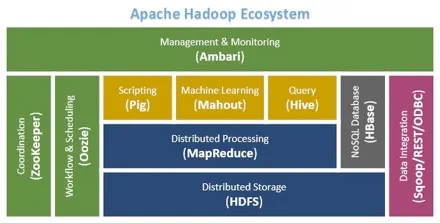

## **📚️Architecture**

**Name Node:** Manages file system namespaces

**Date Node:** Manages Data

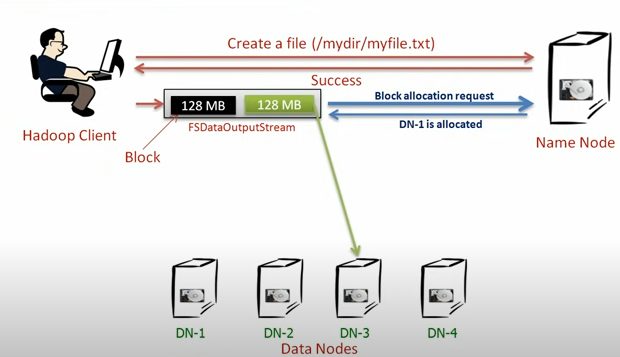

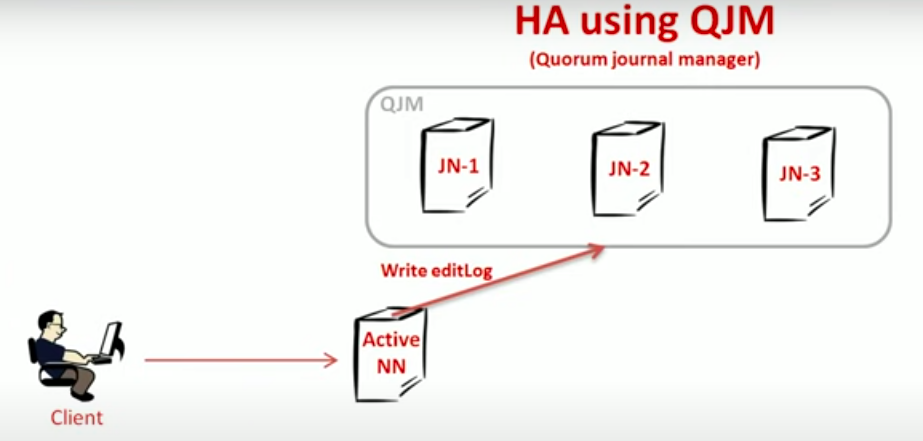

# **🚀 Map Reduce**

MapReduce es un modelo de programación y una implementación asociada para procesar y generar grandes conjuntos de datos con un algoritmo distribuido paralelo en un clúster.

Un programa MapReduce se compone de un procedimiento map, que filtra y clasifica (como clasificar a los estudiantes por nombre en colas, una cola para cada nombre), y un método reduce, que realiza una operación de resumen (como contar el número de estudiantes en cada cola, lo que arroja frecuencias de nombres). 

El "Sistema MapReduce" (también llamado "infraestructura" o "marco") organiza el procesamiento ordenando los servidores distribuidos, ejecutando las diversas tareas en paralelo, administrando todas las comunicaciones y transferencias de datos entre las diversas partes del sistema y proporcionando redundancia. y tolerancia a fallos.

El modelo es una especialización de la estrategia **dividir-aplicar-combinar** para el análisis de datos. Está inspirado en las funciones *map* y *reduce* comúnmente utilizadas en la programación funcional, aunque su propósito en el marco MapReduce no es el mismo que en sus formas originales.

\

## **📺️ History**

Las primeras implementaciones de Google necesitaban realizar operaciones de multiplicación de grandes matrices para calcular el PageRank, esto es, la clasificación de páginas en una búsqueda. De esta forma se hizo popular MapReduce como un método de cálculo de álgebra lineal. 

La preocupación por tratar grandes colecciones de datos, llevó a crear algoritmos y frameworks capaces de poder procesar terabytes de información. Una de las primeras aplicaciones capaces de programar MapReduce fue implementado inicialmente en Hadoop, diseñado inicialmente por Doug Cutting, que lo nombró así por el elefante de juguete de su hijo. 

\

## **📚️Logical View**

Las funciones Map y Reduce de MapReduce se definen con respecto a los datos estructurados en pares (clave, valor). Map toma un par de datos con un tipo en un dominio de datos y devuelve una lista de pares en un dominio diferente:

```
  Map(k1, v1) -> list(k2, v2)
```

La función Map se aplica en paralelo a cada par (k1 como clave) en el conjunto de datos de entrada. Esto produce una lista de pares (k2 como clave) para cada llamada. Después de eso, el marco MapReduce recopila todos los pares con la misma clave (k2) de todas las listas y los agrupa, creando un grupo para cada clave.

Luego, la función Reduce se aplica en paralelo a cada grupo, lo que a su vez produce una colección de valores en el mismo dominio:
```
  Reduce(k2, list(v2)) -> list((k3, v3))
```

Cada llamada Reduce normalmente produce un par de valores clave o un retorno vacío, aunque una llamada puede devolver más de un par de valores clave. Las devoluciones de todas las llamadas se recopilan como la lista de resultados deseados.

Por lo tanto, el marco MapReduce transforma una lista de pares (clave, valor) en otra lista de pares (clave, valor). Este comportamiento es diferente del map y reduce del paradigma de programación funcional típico, que acepta una lista de valores arbitrarios y devuelve un solo valor que combina todos los valores devueltos por el map.

Es necesario pero no suficiente tener implementaciones del map y reduce las abstracciones para implementar MapReduce. Las implementaciones distribuidas de MapReduce requieren un medio para conectar los procesos que realizan las fases Map y Reduce. Esto puede ser un sistema de archivos distribuido. Son posibles otras opciones, como la transmisión directa de los mapeadores a los reductores, o que los procesadores de mapeo envíen sus resultados a los reductores que los consultan.


### **🌀 Example**

El ejemplo común de MapReduce cuenta la aparición de cada palabra en un conjunto de documentos

```javascript
  function map(String name, String document):
    // name: document name
    // document: document contents
    for each word w in document:
      emit (w, 1)

  function reduce(
    String word,
    Iterator partialCounts
  ):
      // word: a word
      // partialCounts: a list of aggregated partial counts
      sum = 0
      for each pc in partialCounts:
        sum += pc
      emit (word, sum)
```

Aquí, cada documento se divide en palabras, y la función de mapa cuenta cada palabra, utilizando la palabra como clave de resultado. El marco reúne todos los pares con la misma clave y los alimenta a la misma llamada para reducir. Por lo tanto, esta función solo necesita sumar todos sus valores de entrada para encontrar el total de apariciones de esa palabra.

Como otro ejemplo, imagine que para una base de datos de 1.100 millones de personas, a uno le gustaría calcular el número promedio de contactos sociales que tiene una persona según la edad. En SQL, dicha consulta podría expresarse como:

```javascript
    SELECT age, AVG(contacts)
        FROM social.person
    GROUP BY age
    ORDER BY age
```

¿Cómo lo harían?

\

## **🔀 Dataflow**

La arquitectura del marco de software se adhiere al principio *open-closed* donde el código se divide efectivamente en puntos congelados no modificables y puntos calientes extensibles . El punto congelado del marco MapReduce es un gran tipo distribuido. Los puntos calientes, que define la aplicación, son:

* Input reader
* Map function
* Partition function
* Comparison function
* Reduce function
* Output writer


### **🧧 Input reader** 

El lector de entrada divide la entrada en "divisiones" de tamaño adecuado (en la práctica, normalmente, de 64 MB a 128 MB) y el marco asigna una división a cada función de mapa . El lector de entrada lee datos del almacenamiento estable (normalmente, un sistema de archivos distribuido ) y genera pares clave/valor.

Un ejemplo común leerá un directorio lleno de archivos de texto y devolverá cada línea como un registro.

### **🔥 Map function**

La función Map toma una serie de pares clave/valor, procesa cada uno y genera cero o más pares clave/valor de salida. Los tipos de entrada y salida del mapa pueden ser (y a menudo lo son) diferentes entre sí.

Si la aplicación realiza un recuento de palabras, la función de mapa dividiría la línea en palabras y generaría un par clave/valor para cada palabra. Cada par de salida contendría la palabra como clave y el número de instancias de esa palabra en la línea como valor.

### **🦐 Partition function**

La función de partición de la aplicación asigna cada resultado de la función Map a un reductor particular para fines de fragmentación . La función de partición recibe la clave y el número de reductores y devuelve el índice del reductor deseado .

Un valor predeterminado típico es aplicar un hash a la clave y usar el valor hash módulo el número de reductores . Es importante elegir una función de partición que brinde una distribución aproximadamente uniforme de datos por fragmento con fines de balanceo de carga ; de lo contrario, la operación MapReduce puede retrasarse esperando que finalicen los reductores lentos (es decir, los reductores asignados a los porcentajes más grandes de los que no son datos particionados uniformemente).

Entre el mapa y las etapas de reducción, los datos se barajan (ordenados en paralelo/intercambiados entre nodos) para mover los datos del nodo del mapa que los produjo al fragmento en el que se reducirán. A veces, la reproducción aleatoria puede tardar más que el tiempo de cálculo, según el ancho de banda de la red, las velocidades de la CPU, los datos producidos y el tiempo que tarda el mapa y reducir los cálculos.

### **💥 Comparison function**

La entrada para cada Reducir se extrae de la máquina donde se ejecutó el Mapa y se ordena mediante la función de comparación de la aplicación .

### **🧮 Reduce function** 

El marco llama a la función Reducir de la aplicación una vez para cada clave única en el orden ordenado. Reduce puede iterar a través de los valores asociados con esa clave y producir cero o más salidas.

En el ejemplo del conteo de palabras, la función Reducir toma los valores de entrada, los suma y genera una única salida de la palabra y la suma final.

### **✏️ Output writer**
Output Writer escribe la salida de Reduce en el almacenamiento estable.

\

## **☕️ Java Example**

### **💥 Versions**

```bash
hadoop version 
javac -version
```


### **📚️ Generar el archivo WordCount.java**

```javascript
import java.io.IOException;
import java.util.StringTokenizer;

import org.apache.hadoop.conf.Configuration;
import org.apache.hadoop.fs.Path;
import org.apache.hadoop.io.IntWritable;
import org.apache.hadoop.io.Text;
import org.apache.hadoop.mapreduce.Job;
import org.apache.hadoop.mapreduce.Mapper;
import org.apache.hadoop.mapreduce.Reducer;
import org.apache.hadoop.mapreduce.lib.input.FileInputFormat;
import org.apache.hadoop.mapreduce.lib.output.FileOutputFormat;

public class WordCount {

  public static class TokenizerMapper
       extends Mapper<Object, Text, Text, IntWritable>{

    private final static IntWritable one = new IntWritable(1);
    private Text word = new Text();

    public void map(Object key, Text value, Context context
                    ) throws IOException, InterruptedException {
      StringTokenizer itr = new StringTokenizer(value.toString());
      while (itr.hasMoreTokens()) {
        word.set(itr.nextToken());
        context.write(word, one);
      }
    }
  }

  public static class IntSumReducer
       extends Reducer<Text,IntWritable,Text,IntWritable> {
    private IntWritable result = new IntWritable();

    public void reduce(Text key, Iterable<IntWritable> values,
                       Context context
                       ) throws IOException, InterruptedException {
      int sum = 0;
      for (IntWritable val : values) {
        sum += val.get();
      }
      result.set(sum);
      context.write(key, result);
    }
  }

  public static void main(String[] args) throws Exception {
    Configuration conf = new Configuration();
    Job job = Job.getInstance(conf, "word count");
    job.setJarByClass(WordCount.class);
    job.setMapperClass(TokenizerMapper.class);
    job.setCombinerClass(IntSumReducer.class);
    job.setReducerClass(IntSumReducer.class);
    job.setOutputKeyClass(Text.class);
    job.setOutputValueClass(IntWritable.class);
    FileInputFormat.addInputPath(job, new Path(args[0]));
    FileOutputFormat.setOutputPath(job, new Path(args[1]));
    System.exit(job.waitForCompletion(true) ? 0 : 1);
  }
}
```

### **🌀 Generar archivo de texto acontar**

```javascript
mkdir input_file
echo "hola mundo desde hadoop" > input_file/input.txt

hdfs dfs -mkdir /WordCountTutorial
hdfs dfs -mkdir /WordCountTutorial/Input
hdfs dfs -put input_data/input.txt /WordCountTutorial/Input


```

### **🍅 Crear el directorio de clases para java**

```javascript
mkdir tutorial_clases
```

### **⭐️ Exportar variables de ambiente**

```javascript
export JAVA_HOME=/usr/java/default
export PATH=${JAVA_HOME}/bin:${PATH}
export HADOOP_CLASSPATH=/usr/lib/jvm/java-7-openjdk-amd64/lib/tools.jar
```


### **✏️ Generar las clases de nuestro ambiente**

```javascript
hadoop com.sun.tools.javac.Main WordCount.java
```
### **♟️ Generar nuestro jar para java**

```javascript
jar cf wc.jar WordCount*.class
```

### **⚒️ Correr nuestro contador de palabras**

```
hadoop jar $PWD/wc.jar WordCount /WordCountTutorial/Input /WordCountTutorial/Output
```

### **🛸 Ver el resultado**

```javascript
hdfs dfs -cat /WordCountTutorial/Output/part-r-00000
```

\


## **✏️ Docs**

<div align="center">
  <img src="https://i0.wp.com/0x0fff.com/wp-content/uploads/2014/12/MapReduce-v3.png" />
</div>

\



